#Spectrograms

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import pandas as pd
import librosa
import librosa.display
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dir = os.listdir('/content/drive/MyDrive/audio/Audio_Speech_Actors_01-24')
dir.sort()
print (dir)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [ ]:
df = pd.DataFrame(columns=['path', 'label'])
count = 0
for actor in dir:
    files = os.listdir('/content/drive/MyDrive/audio/Audio_Speech_Actors_01-24/' + actor)
    for file in files:
        name = file.split('.')[0].split('-')
        path = '/content/drive/MyDrive/audio/Audio_Speech_Actors_01-24/' + actor + '/' + file
        label = int(name[2])
        
        if label==4 or label==5 or label==6 or label==7:
          label=1 # depressed
        else: 
          label=0 # non_depressed
            
        df.loc[count] = [path,label]
        count += 1
ind=[i for i in range(0,1440)]
i=pd.DataFrame(ind)
i=i.rename(columns={0:"ind"})
df=pd.concat([i,df],axis=1)

In [ ]:
print (len(df))
df

1440


,ind,path,label
0,0,/content/drive/MyDrive/audio/Audio_Speech_Acto...,0
1,1,/content/drive/MyDrive/audio/Audio_Speech_Acto...,0
2,2,/content/drive/MyDrive/audio/Audio_Speech_Acto...,0
3,3,/content/drive/MyDrive/audio/Audio_Speech_Acto...,0
4,4,/content/drive/MyDrive/audio/Audio_Speech_Acto...,0
...,...,...,...
1435,1435,/content/drive/MyDrive/audio/Audio_Speech_Acto...,1
1436,1436,/content/drive/MyDrive/audio/Audio_Speech_Acto...,0
1437,1437,/content/drive/MyDrive/audio/Audio_Speech_Acto...,0
1438,1438,/content/drive/MyDrive/audio/Audio_Speech_Acto...,0


In [ ]:
df.label.value_counts()

1    768
0    672
Name: label, dtype: int64

In [ ]:
filename = df.path[1000]
print (filename)

samples, sample_rate = librosa.load(filename)
samples,sample_rate

/content/drive/MyDrive/audio/Audio_Speech_Actors_01-24/Actor_17/03-01-06-01-01-02-17.wav


(array([-5.32609374e-05, -9.79144534e-05, -1.15671755e-04, ...,
         1.10219677e-04,  1.16221643e-04,  0.00000000e+00], dtype=float32),
 22050)

In [ ]:
len(samples), sample_rate 

(77253, 22050)

In [ ]:
def log_specgram(audio, sample_rate):
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate)
    return freqs, times, np.log(spec.T)

Text(0.5, 0, 'Seconds')

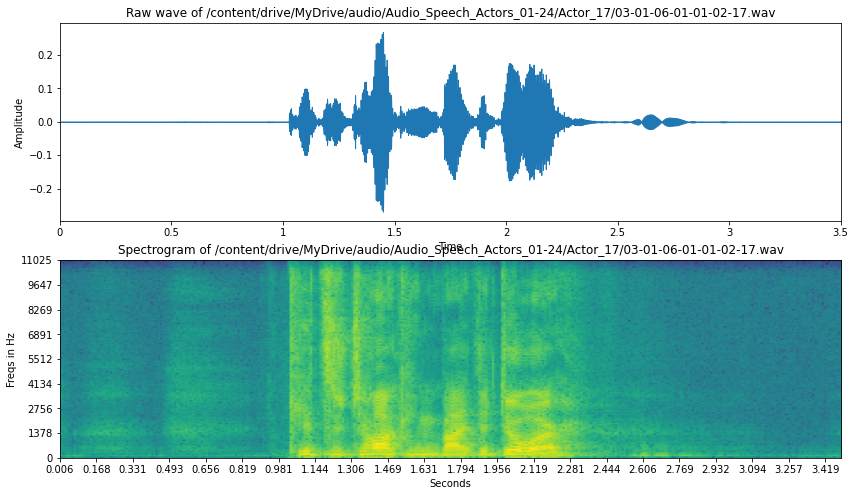

In [ ]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [ ]:
!pip install -q -U opensoundscape

     |████████████████████████████████| 109 kB 5.5 MB/s 
     |████████████████████████████████| 131 kB 9.5 MB/s 
     |████████████████████████████████| 8.7 MB 9.6 MB/s 
     |████████████████████████████████| 53.2 MB 113 kB/s 
     |████████████████████████████████| 793 kB 61.3 MB/s 
     |████████████████████████████████| 428 kB 60.5 MB/s 
     |████████████████████████████████| 130 kB 68.4 MB/s 
     |████████████████████████████████| 381 kB 65.5 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 343 kB 64.3 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 561 kB 63.5 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |█████████████████████████

In [ ]:
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram
from pathlib import Path

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
l_train=[]
for i in train.index:
  l_train.append(df.ind[i])
l_test=[]
for i in test.index:
  l_test.append(df.ind[i])

In [ ]:
train.label.value_counts()

1    627
0    525
Name: label, dtype: int64

In [ ]:
test.label.value_counts()

0    147
1    141
Name: label, dtype: int64

In [ ]:
train.head()

,ind,path,label
1148,1148,/content/drive/MyDrive/audio/Audio_Speech_Acto...,0
677,677,/content/drive/MyDrive/audio/Audio_Speech_Acto...,0
221,221,/content/drive/MyDrive/audio/Audio_Speech_Acto...,0
113,113,/content/drive/MyDrive/audio/Audio_Speech_Acto...,1
845,845,/content/drive/MyDrive/audio/Audio_Speech_Acto...,1


In [ ]:
# no run
# training dataset
for i in train.index:
  image_save_path=''
  label=train['label'][i]
  path=train['path'][i]
  if label==1:
    img_path = Path('/content/drive/MyDrive/audio/train/depressed/'+path.split('/')[7].split('.')[0]+'.png')
  else:
    img_path = Path('/content/drive/MyDrive/audio/train/non_depressed/'+path.split('/')[7].split('.')[0]+'.png')
  data = Audio.from_file(path)
  spec = Spectrogram.from_audio(data)
  img = spec.to_image(shape=(224, 224))
  img.save(img_path)

In [ ]:
# no run
# testing dataset
for i in test.index:
  image_save_path=''
  label=test['label'][i]
  path=test['path'][i]
  if label==1:
    img_path = Path('/content/drive/MyDrive/audio/test/depressed/'+path.split('/')[7].split('.')[0]+'.png')
  else:
    img_path = Path('/content/drive/MyDrive/audio/test/non_depressed/'+path.split('/')[7].split('.')[0]+'.png')
  data = Audio.from_file(path)
  spec = Spectrogram.from_audio(data)
  img = spec.to_image(shape=(224, 224))
  img.save(img_path)

In [ ]:
from sklearn.datasets import load_files
from keras.utils import np_utils
def load_dataset(path):
    data = load_files(path)
    path = np.array(data["filenames"])
    target = np_utils.to_categorical(np.array(data['target']), 2)
    return path,target

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


In [ ]:
train_x,train_y=load_dataset('/content/drive/MyDrive/audio/train/')
test_x,test_y=load_dataset('/content/drive/MyDrive/audio/test/')

In [ ]:
print(len(train_x))
print(len(train_y))
print(len(test_x))
print(len(test_y))

1152
1152
288
288


In [ ]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

train_tensors = paths_to_tensor(train_x).astype('float32')/255
test_tensors = paths_to_tensor(test_x).astype('float32')/255

100%|██████████| 288/288 [00:00<00:00, 315.92it/s]


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
import keras

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same',
                 activation='relu', input_shape=train_tensors.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(GlobalAveragePooling2D())
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8

In [ ]:
#no_run
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#no_run
model.fit(train_tensors, train_y, epochs=20, batch_size=20, verbose=1)

Epoch 1/20
58/58 [==============================] - 71s 1s/step - loss: 0.6925 - accuracy: 0.5443
Epoch 2/20
58/58 [==============================] - 70s 1s/step - loss: 0.6919 - accuracy: 0.5443
Epoch 3/20
58/58 [==============================] - 69s 1s/step - loss: 0.6906 - accuracy: 0.5443
Epoch 4/20
58/58 [==============================] - 70s 1s/step - loss: 0.6887 - accuracy: 0.5443
Epoch 5/20
58/58 [==============================] - 70s 1s/step - loss: 0.6864 - accuracy: 0.5443
Epoch 6/20
58/58 [==============================] - 71s 1s/step - loss: 0.6802 - accuracy: 0.5443
Epoch 7/20
58/58 [==============================] - 69s 1s/step - loss: 0.6772 - accuracy: 0.5443
Epoch 8/20
58/58 [==============================] - 69s 1s/step - loss: 0.6719 - accuracy: 0.5668
Epoch 9/20
58/58 [==============================] - 69s 1s/step - loss: 0.6695 - accuracy: 0.5634
Epoch 10/20
58/58 [==============================] - 69s 1s/step - loss: 0.6629 - accuracy: 0.5877
Epoch 11/20
58/58 [

In [ ]:
#no_run
import pickle
pickle.dump(model, open("/content/drive/MyDrive/audio/models/spec_cnn.pkl",'wb'))

INFO:tensorflow:Assets written to: ram://a6bbecb1-890a-4eac-9aa9-d2d0ec823ba7/assets


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ResourceWarning: unclosed file <_io.BufferedWriter name='/content/drive/MyDrive/audio/models/spec_cnn.pkl'>
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import pickle
spec_cnn = pickle.load(open("/content/drive/MyDrive/audio/models/spec_cnn.pkl", 'rb'))
pred_cnn = [np.argmax(spec_cnn.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy = 100*np.sum(np.array(pred_cnn)==np.argmax(test_y, axis=1))/len(pred_cnn)
print('Accuracy: %.2f%%' % test_accuracy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='/content/drive/MyDrive/audio/models/spec_cnn.pkl'>
  


Accuracy: 56.60%


#Mixed

In [ ]:
#no run
from librosa import feature
df_new=pd.DataFrame()
for i in df.index:
  sample,sample_rate=librosa.load(df.path[i])
  stft_spectrogram=np.abs(librosa.stft(sample))
  chroma=np.mean(feature.chroma_stft(S=stft_spectrogram,sr=sample_rate),axis=1)
  mel_spec=np.mean(feature.melspectrogram(y=sample,sr=sample_rate,n_mels=128, fmax=8000),axis=1)
  mfcc=np.mean(feature.mfcc(y=sample, sr=sample_rate, n_mfcc=40),axis=1)
  new_df=pd.DataFrame()
  mfcc_df=pd.DataFrame(mfcc).T
  chroma_df=pd.DataFrame(chroma).T
  mel_spec_df=pd.DataFrame(mel_spec).T
  new_df=pd.concat([mfcc_df,chroma_df,mel_spec_df],axis=1)
  df_new=pd.concat([df_new,new_df])
f_names=[]
ro=[]
for i in range(0,40):
  f_names.append('mfcc'+str(i))
for i in range(0,12):
  f_names.append('chroma'+str(i))
for i in range(0,128):
  f_names.append('mel'+str(i))
for i in range(0,1440):
  ro.append(i)
df_new.set_axis(f_names, axis=1, inplace=True)
df_new.set_axis(ro, axis=0, inplace=True)
df_new

/usr/local/lib/python3.7/dist-packages/librosa/util/utils.py:2099: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.dtype(np.float): np.complex,
/usr/local/lib/python3.7/dist-packages/librosa/util/utils.py:2099: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.dtype(np.float): np.complex,
/usr/local/lib/python3.7/dist-packages/li

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mel118,mel119,mel120,mel121,mel122,mel123,mel124,mel125,mel126,mel127
0,-685.237915,56.236694,2.453112,13.566656,6.701949,3.341493,-1.895053,-6.673817,-10.671633,-2.946320,...,0.000053,0.000022,0.000015,0.000013,0.000023,0.000032,0.000032,0.000019,0.000022,0.000024
1,-727.317932,62.764400,2.751275,15.473256,7.763115,2.330714,-3.641682,-3.367344,-10.113077,-4.470085,...,0.000015,0.000007,0.000007,0.000005,0.000006,0.000006,0.000006,0.000005,0.000007,0.000007
2,-691.770142,58.350647,-0.165160,13.952126,5.053323,1.489326,-2.397429,-5.059065,-10.638002,-3.344197,...,0.000068,0.000042,0.000023,0.000031,0.000027,0.000024,0.000018,0.000018,0.000013,0.000009
3,-698.853943,69.106430,0.725411,14.090734,7.961055,2.463775,-0.994342,-5.345838,-8.234461,-4.035145,...,0.000038,0.000025,0.000023,0.000015,0.000013,0.000016,0.000042,0.000024,0.000014,0.000006
4,-707.553467,67.097733,1.909365,11.530989,9.399661,1.415027,-4.764856,-4.333333,-8.645218,-4.472897,...,0.000010,0.000009,0.000004,0.000004,0.000003,0.000002,0.000005,0.000005,0.000004,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-568.232727,51.563114,-18.014147,5.876663,-12.323577,-11.745095,-14.530390,-15.391083,-14.104690,-2.859934,...,0.001789,0.001966,0.001436,0.001703,0.001759,0.001192,0.000838,0.000995,0.001486,0.001623
1436,-572.542053,33.990803,-15.513978,-3.087590,-12.770017,-9.795465,-14.526377,-13.480703,-6.559319,-3.844539,...,0.000215,0.000220,0.000178,0.000175,0.000199,0.000221,0.000121,0.000185,0.000181,0.000143
1437,-605.823425,30.158146,-10.581247,1.586163,-10.953780,-5.515555,-12.217123,-9.309647,-7.464720,-4.780900,...,0.001762,0.002710,0.001917,0.001663,0.001748,0.001575,0.001625,0.001711,0.001175,0.000900
1438,-518.293823,30.043261,-4.414401,-0.645565,-5.760980,-6.644137,-11.744141,-6.214061,-8.602053,-1.564242,...,0.010253,0.007983,0.010243,0.009611,0.007406,0.006223,0.006011,0.005976,0.004500,0.005484


In [ ]:
#no_run
df_new.to_csv('/content/drive/MyDrive/audio/df_new.csv')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/audio/df_new.csv')
label=df.label
data=pd.concat([data,label],axis=1)
data=data.drop(['Unnamed: 0'],axis=1)

In [ ]:
data.head()

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mel119,mel120,mel121,mel122,mel123,mel124,mel125,mel126,mel127,label
0,-685.23790,56.236694,2.453112,13.566656,6.701949,3.341493,-1.895053,-6.673817,-10.671633,-2.946320,...,0.000022,0.000015,0.000013,0.000023,0.000032,0.000032,0.000019,0.000022,0.000024,0
1,-727.31793,62.764400,2.751275,15.473256,7.763115,2.330715,-3.641682,-3.367344,-10.113077,-4.470085,...,0.000007,0.000007,0.000005,0.000006,0.000006,0.000006,0.000005,0.000007,0.000007,0
2,-691.77014,58.350647,-0.165160,13.952126,5.053323,1.489326,-2.397429,-5.059065,-10.638002,-3.344197,...,0.000042,0.000023,0.000031,0.000027,0.000024,0.000018,0.000018,0.000013,0.000009,0
3,-698.85394,69.106430,0.725411,14.090734,7.961055,2.463775,-0.994342,-5.345838,-8.234461,-4.035145,...,0.000025,0.000023,0.000015,0.000013,0.000016,0.000042,0.000024,0.000014,0.000006,0
4,-707.55347,67.097730,1.909365,11.530989,9.399661,1.415027,-4.764856,-4.333334,-8.645218,-4.472897,...,0.000009,0.000004,0.000004,0.000003,0.000002,0.000005,0.000005,0.000004,0.000003,0


In [ ]:
# from sklearn.model_selection import train_test_split
# train,test=train_test_split(data,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
train=pd.DataFrame(columns=data.columns)
test=pd.DataFrame(columns=data.columns)
for i in l_train:
  train=pd.concat([train,pd.DataFrame(data.iloc[i]).T],axis=0)
for i in l_test:
  test=pd.concat([test,pd.DataFrame(data.iloc[i]).T],axis=0)
train.shape,test.shape

((1152, 181), (288, 181))

In [ ]:
y_train=train['label']
y_test=test['label']
y_train=y_train.astype('int')
y_test=y_test.astype('int')
train=train.drop(['label'],axis=1)
test=test.drop(['label'],axis=1)
x_train=train.to_numpy()
x_test=test.to_numpy()

In [ ]:
y_train.shape,y_test.shape,x_train.shape,x_test.shape,train.shape

((1152,), (288,), (1152, 180), (288, 180), (1152, 180))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.transform(x_test)

In [ ]:
x_train.shape,x_test.shape

((1152, 180), (288, 180))

In [ ]:
target_names=[0,1]
target_names=list(map(str,target_names))

In [ ]:
#no_run
import pickle
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', solver = 'liblinear', C=1, penalty = 'l2')
lr.fit(x_train, y_train)

pickle.dump(lr, open("/content/drive/MyDrive/audio/models/lr.pkl",'wb'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ResourceWarning: unclosed file <_io.BufferedWriter name='/content/drive/MyDrive/audio/models/lr.pkl'>
  


In [ ]:
lr=pickle.load(open("/content/drive/MyDrive/audio/models/lr.pkl", 'rb'))
pred_lr = lr.predict(x_test)
print("Logistic Regression accuracy = %0.2f" % (accuracy_score(y_test, pred_lr)*100),'%')

Logistic Regression accuracy = 61.11 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='/content/drive/MyDrive/audio/models/lr.pkl'>
  """Entry point for launching an IPython kernel.


In [ ]:
#no_run
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import pickle
mb = MultinomialNB()
mb.fit(x_train, y_train)

pickle.dump(mb, open("/content/drive/MyDrive/audio/models/mb.pkl",'wb'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ResourceWarning: unclosed file <_io.BufferedWriter name='/content/drive/MyDrive/audio/models/mb.pkl'>
  


In [ ]:
mb=pickle.load(open("/content/drive/MyDrive/audio/models/mb.pkl", 'rb'))
pred_mb = mb.predict(x_test)
print("Multinomial Naive Bayes accuracy = %0.2f" % (accuracy_score(y_test, pred_mb)*100),'%')

Multinomial Naive Bayes accuracy = 58.68 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='/content/drive/MyDrive/audio/models/mb.pkl'>
  """Entry point for launching an IPython kernel.


In [ ]:
#no_run
from sklearn.svm import SVC
import pickle
svm=SVC(kernel='rbf')
svm.fit(x_train, y_train)

pickle.dump(svm, open("/content/drive/MyDrive/audio/models/svm.pkl",'wb'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.BufferedWriter name='/content/drive/MyDrive/audio/models/svm.pkl'>
  import sys


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
def results(model):
  plot_confusion_matrix(model,x_test,y_test,cmap='Blues')
  print(classification_report(y_test, model.predict(x_test), target_names=model.classes_))

SVM accuracy = 62.15 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='/content/drive/MyDrive/audio/models/svm.pkl'>
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


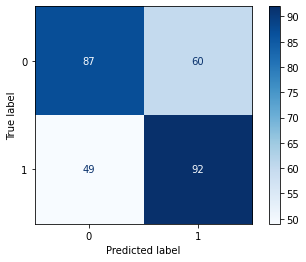

In [ ]:
svm=pickle.load(open("/content/drive/MyDrive/audio/models/svm.pkl", 'rb'))
pred_svm = svm.predict(x_test)
print("SVM accuracy = %0.2f" % (accuracy_score(y_test, pred_svm)*100),'%')
plot_confusion_matrix(svm,x_test,y_test,cmap='Blues')

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import plot_confusion_matrix
models=[]
models.append(['MNB',mb])
models.append(['SVM',svm])
models.append(['LR',lr])
voting = VotingClassifier(estimators=models)
voting.fit(x_train, y_train)
pickle.dump(voting, open("/content/drive/MyDrive/audio/models/voting.pkl",'wb'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ResourceWarning: unclosed file <_io.BufferedWriter name='/content/drive/MyDrive/audio/models/voting.pkl'>
  if __name__ == "__main__":


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='/content/drive/MyDrive/audio/models/voting.pkl'>
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Combined Models accuracy = 61.46 %


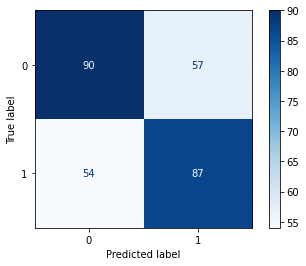

In [ ]:
voting=pickle.load(open("/content/drive/MyDrive/audio/models/voting.pkl",'rb'))
predictions = voting.predict(x_test)
print("Combined Models accuracy = %0.2f" % (accuracy_score(y_test, predictions)*100),'%')
plot_confusion_matrix(voting,x_test,y_test,cmap='Blues')

#MFCC

In [ ]:
#
feat=[]
lab=[]
for ind in df.index:
  X, sample_rate = librosa.load(df.path[ind], res_type='kaiser_fast',offset=0.5,duration=3)
  mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate,n_mfcc=40).T,axis=0)
  feat.append(mfcc)
  lab.append(df.label[ind])
x=np.asarray(feat)
y=np.asarray(lab)
x.shape,y.shape

/usr/local/lib/python3.7/dist-packages/librosa/util/utils.py:2099: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.dtype(np.float): np.complex,
/usr/local/lib/python3.7/dist-packages/librosa/util/utils.py:2099: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.dtype(np.float): np.complex,


((1440, 40), (1440,))

In [ ]:
#
mfcc_df=pd.DataFrame(x)
mfcc_df.to_csv('/content/drive/MyDrive/audio/mfcc_df.csv')

In [ ]:
import pandas as pd
mfcc_df=pd.read_csv('/content/drive/MyDrive/audio/mfcc_df.csv')
mfcc_df=mfcc_df.drop(columns={'Unnamed: 0'})
mfcc_df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-660.67413,69.261800,-1.020716,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,-2.445284,-3.353117,-3.061760,-3.655032,-2.925077,-2.213564,-0.704934,-3.643078,-3.353249,-4.489710
1,-697.92834,77.317604,-1.614730,21.720346,4.623217,6.101532,-8.184629,-1.011079,-15.274772,-2.709049,...,-1.843135,-2.096760,-1.578658,-3.606606,-1.330666,-1.291108,-1.321529,-2.835258,-3.818654,-4.000565
2,-664.77620,70.703840,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,-1.751716,-3.179488,-2.378813,-2.930585,-2.756831,-3.016411,-0.853317,-3.885773,-3.591683,-3.337019
3,-670.68610,84.359840,-4.808590,19.875542,3.995751,6.157571,-5.836203,-3.282192,-13.550856,-2.352552,...,-3.580150,-2.780655,-2.004841,-3.760762,-3.452391,-2.778040,-0.733324,-3.431729,-3.369152,-4.579460
4,-679.33716,84.998260,-2.166422,17.868710,7.162031,5.412873,-9.361197,-1.947763,-13.468863,-2.551003,...,-3.326585,-3.551274,-3.251900,-4.944743,-3.661923,-2.283727,-1.673906,-4.537850,-4.293913,-5.687407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-504.59393,70.259000,-31.236490,10.297205,-21.255554,-12.095650,-22.477476,-16.730803,-21.103283,-0.366224,...,3.371044,2.831022,5.349463,4.889908,3.739686,2.219679,0.385977,-0.021864,0.415646,0.268677
1436,-543.83020,45.394350,-23.608750,1.607920,-20.002542,-6.605508,-21.726131,-11.502317,-11.724482,-0.892609,...,0.762056,3.326545,2.419024,1.144847,0.111276,0.273160,-0.618049,-0.631512,-1.333395,-0.503581
1437,-574.93780,40.536640,-17.727976,6.968427,-17.931944,-1.704691,-18.984343,-6.699153,-12.609295,-2.001822,...,-0.693032,-0.431320,0.572733,1.484614,1.981714,1.063077,0.427126,-2.040821,-2.201573,-2.114613
1438,-489.57980,40.993717,-9.111548,3.572139,-11.771232,-1.890940,-18.007534,-1.483183,-15.369284,1.908056,...,0.721902,1.388721,0.045357,0.378315,0.639321,0.775868,0.129960,-0.831558,-1.554926,-0.063813


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mfcc_df, y, test_size=0.2, random_state=42)

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, x_test.shape

((1152, 40, 1), (288, 40, 1))

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout,Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv1D(128, 8,padding='same',input_shape=(40,1),activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 5,padding='same',activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 128)           1152      
                                                                 
 dropout_2 (Dropout)         (None, 40, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 128)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 64)             41024     
                                                                 
 dropout_3 (Dropout)         (None, 5, 64)             0         
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.00005),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=500)

Epoch 1/500
58/58 [==============================] - 2s 9ms/step - loss: 3.9366 - accuracy: 0.4644
Epoch 2/500
58/58 [==============================] - 0s 8ms/step - loss: 2.5516 - accuracy: 0.5234
Epoch 3/500
58/58 [==============================] - 1s 9ms/step - loss: 2.5156 - accuracy: 0.4861
Epoch 4/500
58/58 [==============================] - 1s 9ms/step - loss: 2.0917 - accuracy: 0.5217
Epoch 5/500
58/58 [==============================] - 1s 9ms/step - loss: 1.9725 - accuracy: 0.5286
Epoch 6/500
58/58 [==============================] - 1s 9ms/step - loss: 2.0002 - accuracy: 0.5321
Epoch 7/500
58/58 [==============================] - 1s 9ms/step - loss: 1.8131 - accuracy: 0.5312
Epoch 8/500
58/58 [==============================] - 1s 10ms/step - loss: 1.6193 - accuracy: 0.5503
Epoch 9/500
58/58 [==============================] - 1s 10ms/step - loss: 1.6183 - accuracy: 0.5469
Epoch 10/500
58/58 [==============================] - 1s 10ms/step - loss: 1.3011 - accuracy: 0.5964
Epoch 

In [ ]:
import pickle
pickle.dump(model, open("/content/drive/MyDrive/audio/models/mfcc_cnn.pkl",'wb'))


INFO:tensorflow:Assets written to: ram://deca07b7-9d94-4c98-a876-3734b695d29a/assets


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.BufferedWriter name='/content/drive/MyDrive/audio/models/mfcc_cnn.pkl'>
  


In [ ]:
from sklearn.metrics import accuracy_score
mfcc_cnn=pickle.load(open("/content/drive/MyDrive/audio/models/mfcc_cnn.pkl", 'rb'))
pred_mfcc=[np.argmax(mfcc_cnn.predict(np.expand_dims(tensor, axis=0))) for tensor in x_test]
print("Accuracy = %0.2f" % (accuracy_score(y_test, pred_mfcc)*100),'%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='/content/drive/MyDrive/audio/models/mfcc_cnn.pkl'>
  


Accuracy = 82.29 %


In [ ]:
tf.math.confusion_matrix(
    y_test,
    pred_mfcc,
    num_classes=2,
    dtype=tf.dtypes.int32
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[113,  34],
       [ 17, 124]], dtype=int32)>

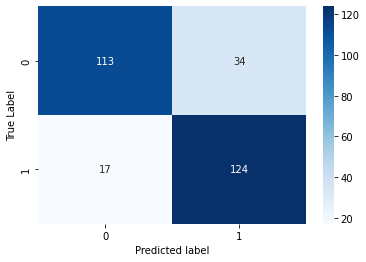

In [ ]:
import seaborn as sn
arr=[[113,34],[17,124]]
df_cm=pd.DataFrame(arr)
sn.heatmap(df_cm,annot=True,cmap='Blues',fmt="d")
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.show() 